#           HEART ATTACK POSSİBİLİTY

# Data Preprocessing

Veri ön işleme, makine öğrenimi ve veri analitiği projelerinde verileri temizlemek, dönüştürmek ve hazırlamak için yaptığımız işlemlerin bir koleksiyonudur. Bu aşamalar, veri setimizin  doğruluğunu artırmak, anlaşılabilirliğini sağlamak ve sonuçların kalitesini iyileştirmek için önemlidir.
İlk adım veri temizlemektir. Bu adımda, veri setindeki eksik, yanlış veya gereksiz verileri tespit eder ve düzeltiriz. Örneğin, eksik değerleri doldurabilir, aykırı değerleri ele alabilir ve gürültülü verileri düzeltebiliriz.
Veri dönüşümü adımında, veri setindeki verileri makine öğrenimi algoritmaları için uygun hale getirmek için dönüşümler yaparız. Örneğin, kategorik verileri sayısal değerlere dönüştürebilir, verileri ölçeklendirebilir veya normalleştirebiliriz. Bu, algoritmaların verileri daha iyi anlamasına ve daha iyi sonuçlar elde etmemize yardımcı olur.
Veri ön işleme, veri analizinde ve makine öğrenimi projelerinde başarı için önemli bir adımdır. Doğru veri ön işleme tekniklerini kullanarak verilerinizi temizler, dönüştürür ve hazırlarsanız, daha güvenilir sonuçlar elde edebilir ve daha iyi kararlar verebilirsiniz.

In [1]:
import pandas as pd
import numpy as np

#verileri okuyalım csv dosyası okuyoruz dikkat edelim 
data=pd.read_csv('heart.csv')

#veri görselleştirme adımı diyebiliriz bilgi topluyoruz burada
data.info()   #sütun adı, veri tipi satır sayısı, bellekte toplam kullanılan alan bilgisi vs sağlar
data.head()   # head içine bir sayı yazmadığımız için ilk 5 satır bilgisini öğreniyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
#Özellik veri tiplerini kontrol etmek ve hedefi elde etmek için işlemler yapacağız.
# veri setindeki sütunların veri tiplerini ve hedef değişkenini belirlemek için kullanıcaz bu kısmı biz
NUM_INPUT = ['age', 'trestbps', 'chol', 'thalach' , 'oldpeak']  # nümerik veri içeren sütun adları
CAT_INPUT = ['sex','cp', 'fbs', 'restecg', 'exang','slope', 'ca', 'thal']  # kategorik veri içeren sütun adları
X = data[CAT_INPUT + NUM_INPUT]
Y = data['target']
X_CAT = data[CAT_INPUT]
X_NUM = data[NUM_INPUT]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Feature Selection

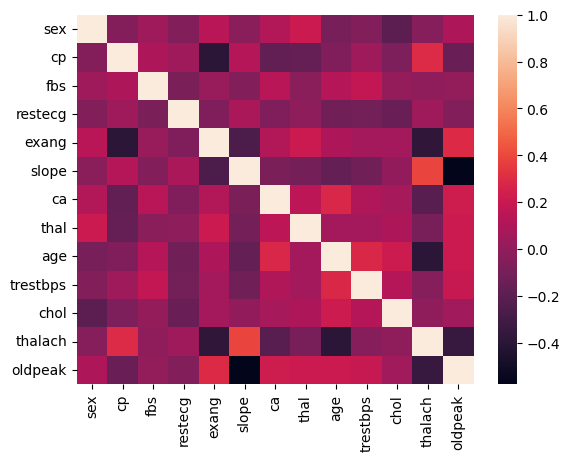

In [3]:
# korelasyon matrisi çizeceğiz.
# korelasyon -1 ile +1 arasında burada - ve + sadece yöndür. sıfır olursa ilişki yok demektir.
# sıfıra yaklaşmak ilişki gücünün azalması demektir. uçlara gidildikçe yöne göre değişen ama gücü artan bir ilişki olur
import seaborn as sns
correlation_matrix = X.corr()
ax = sns.heatmap(correlation_matrix, annot = False)
# annot= True derseniz korelasyon değerleri görüntülenir her bir parsel için ama renkler ile zaten algılayabiliriz. 
#o yüzden ben false yaptım


Optimal Number of Features: 11


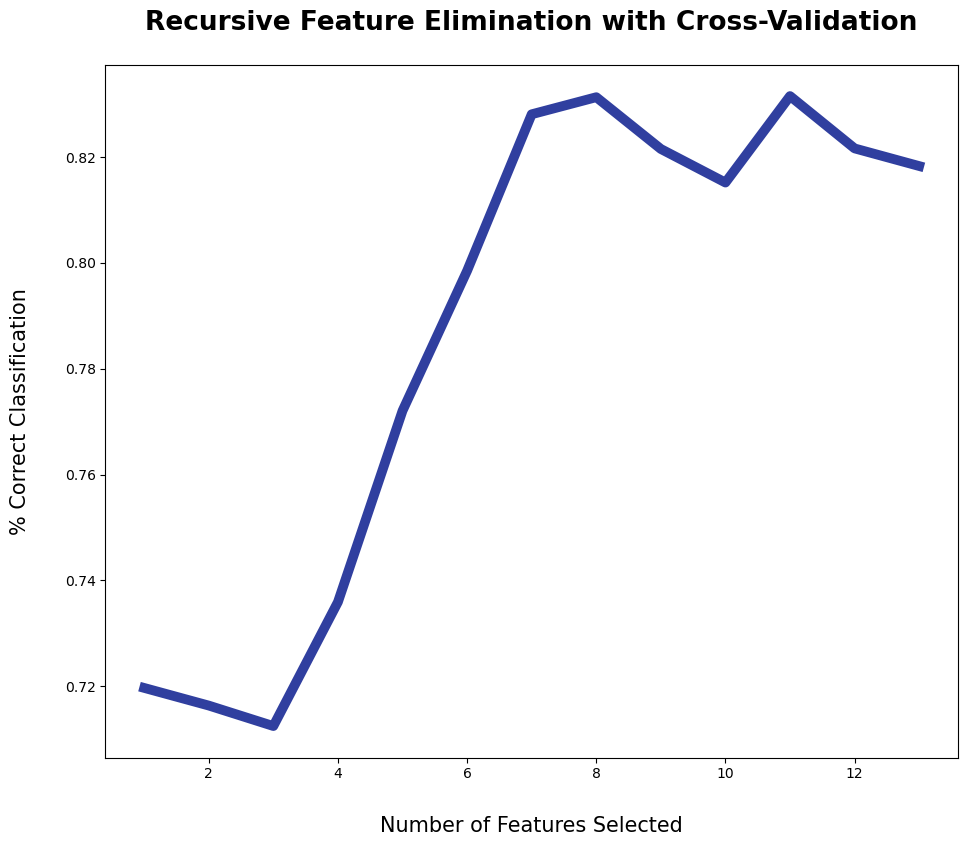

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

lr = LogisticRegression(random_state=101, max_iter=1000)
rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, Y)
print('Optimal Number of Features:', rfecv.n_features_)

plt.figure(figsize=(11, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=19, fontweight='bold', pad=25)
plt.xlabel('Number of Features Selected', fontsize=15, labelpad=25)
plt.ylabel('% Correct Classification', fontsize=15, labelpad=25)
plt.plot(range(1, len(rfecv.support_) + 1), rfecv.cv_results_['mean_test_score'], color='#303F9F', linewidth=7)

plt.show()

Yukarıdaki hücrede gözlemleyebilirsiniz ki RFECV hesaplamasının Lojistik Regresyon ile uyumlu olmadığı görülmektedir. Sonraki adımda, Random Forest Sınıflandırma kullanarak deneyeceğiz.

Optimal Number of Features: 13 


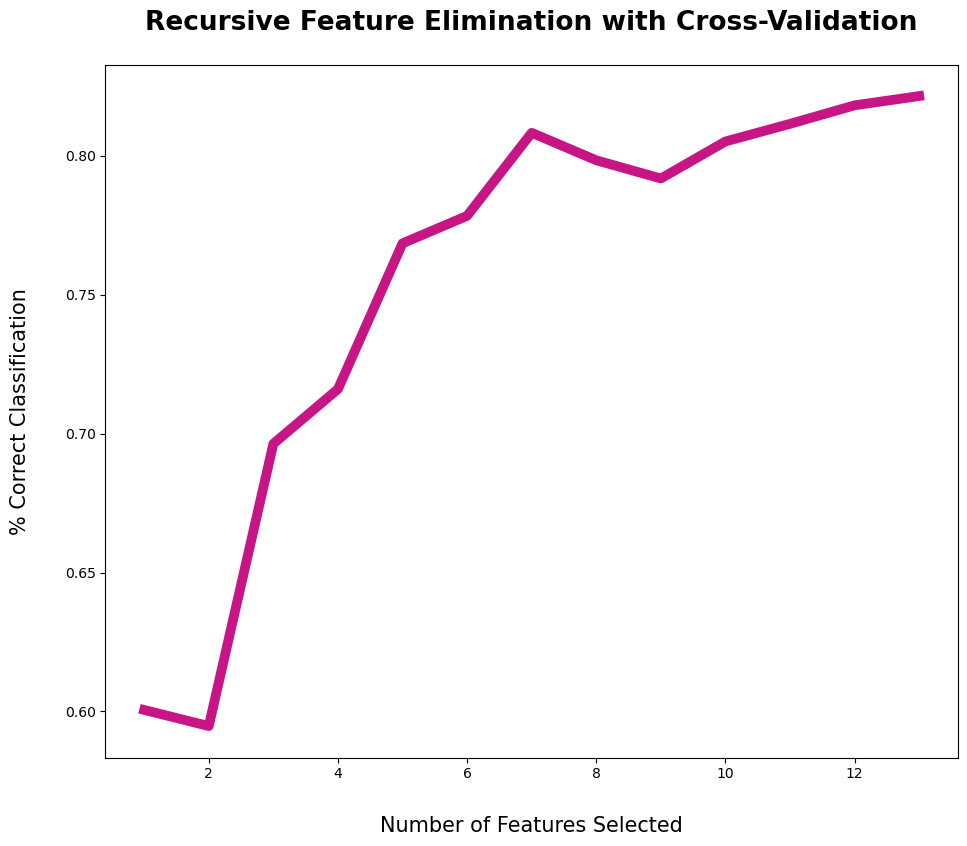

In [5]:
from sklearn.ensemble import RandomForestClassifier

lr = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, Y)
print('Optimal Number of Features: {} '.format(rfecv.n_features_))

plt.figure(figsize=(11, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=19, fontweight='bold', pad=25)
plt.xlabel('Number of Features Selected', fontsize=15, labelpad=25)
plt.ylabel('% Correct Classification', fontsize=15, labelpad=25)
plt.plot(range(1, len(rfecv.support_) + 1), rfecv.cv_results_['mean_test_score'], color='#C71585', linewidth=7)

plt.show()


#  Model Selection 

In [6]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

sc = StandardScaler()
# her bir Pipeline nesnesi, bir ön işleme adımını ve bir modeli içerir.

knn = Pipeline([('scaler',  StandardScaler()), ('model', KNeighborsClassifier())])
svc = Pipeline([('scaler',  StandardScaler()), ('model', SVC())])
dt  = Pipeline([ ('model', DecisionTreeClassifier())])
rfc = Pipeline([ ('model', RandomForestClassifier())])

MODELS = [knn, svc, dt,rfc]

kf = KFold(n_splits=5, shuffle = True, random_state =0)

for model in MODELS:
    scores = np.mean(cross_val_score(model, X, Y, cv = kf))
    print("%15s" %type(model['model']).__name__,"\t",scores)
    
# her bir model için çapraz doğrulama skorları hesaplanır ve yazdırılır.   


KNeighborsClassifier 	 0.8185245901639344
            SVC 	 0.8218579234972678
DecisionTreeClassifier 	 0.7359562841530054
RandomForestClassifier 	 0.8219672131147542


# Overfit/Underfit analysis

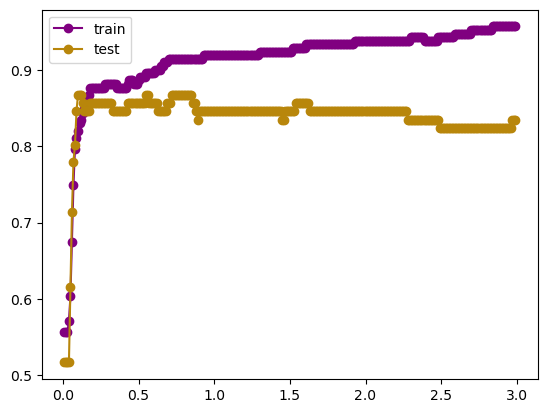

In [7]:
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
# overfitting ve underfitting anaizi yapmak için bir SVM modeli kullanır ve farklı C değerleri için eğitim ve test
# skorlarını görseleştirir.

X_array = sc.fit_transform(X)
X = pd.DataFrame(X_array, columns = X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, random_state = 101)

C_values = np.arange(0.01, 3, 0.01)
train_scores = []
test_scores = []

for i in C_values:
    model = SVC(C = i)
    model.fit(X_train, Y_train)
    train_predict = model.predict(X_train)
    train_acc = accuracy_score(Y_train, train_predict)
    train_scores.append(train_acc)
    test_predict = model.predict(X_test)
    test_acc = accuracy_score(Y_test, test_predict)
    test_scores.append(test_acc)
    #print( '>%d, train: %.3f, test:%.3f' % (i, train_acc, test_acc))
# plot of train and test scoresvs tree depth
pyplot.plot(C_values, train_scores, '-o', color='purple' , label = 'train')
pyplot.plot(C_values, test_scores, '-o', color='darkgoldenrod', label='test')
pyplot.legend()
pyplot.show()


# Hyperparameter optimization

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'C': np.arange(0.01, 1, 0.01), 'kernel' : ['linear']},
    { 'C': np.arange(0.01, 1, 0.01), 'gamma' : [0.01, 0.001, 0.0001], 'kernel' : ['rbf']},
]

svc = SVC()
gs = GridSearchCV(svc, param_grid = param_grid, cv =3, n_jobs = -1, verbose =0)
gs.fit(X, Y)

optimal_parameter = gs.best_params_
print(optimal_parameter)

{'C': 0.02, 'kernel': 'linear'}


In [14]:
# calculating the final score
kf = KFold(n_splits = 5, shuffle = True, random_state =0)
scores = np.mean(cross_val_score(SVC(C =0.02, kernel = 'linear'), X, Y, cv =kf))
print(scores)

0.8350273224043716
